In [58]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.style as mp_style
mp_style.use('../matplotlibrc')

In [3]:
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [4]:
def pre_process_pyrates(text:str, remove_stop_words:bool = True)->str:
    
    # remove underscores
    text = text.replace('_','')

    tokens = word_tokenize(text)
    
    if remove_stop_words:
        stop_words = stopwords.words('english')
        filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word not in string.punctuation]
    else:
        filtered_tokens = [word.lower() for word in tokens if word.lower() not in string.punctuation]
    
    filtered_text = ' '.join(filtered_tokens)

    # remove other special characters
    filtered_text = filtered_text.replace("'d",'')
    filtered_text = filtered_text.replace("'s",'')

    return filtered_text

In [5]:
def pre_process_rc(text:str, remove_stop_words:bool = True)->str:

    # remove special punctuation
    text = text.replace('“','')
    text = text.replace('”','')
    text = text.replace("’",'')

    tokens = word_tokenize(text)
    
    if remove_stop_words:
        stop_words = stopwords.words('english')
        filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word not in string.punctuation]
    else:
        filtered_tokens = [word.lower() for word in tokens if word.lower() not in string.punctuation]
    
    filtered_text = ' '.join(filtered_tokens)

    return filtered_text

In [6]:
def pre_process_gt(text:str, remove_stop_words:bool = True)->str:
    
    # remove special punctuation
    text = text.replace('_','')
    text = text.replace('“','')
    text = text.replace('”','')
    text = text.replace("’",'')

    tokens = word_tokenize(text)
    
    if remove_stop_words:
        stop_words = stopwords.words('english')
        filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word not in string.punctuation]
    else:
        filtered_tokens = [word.lower() for word in tokens if word.lower() not in string.punctuation]
    
    filtered_text = ' '.join(filtered_tokens)

    return filtered_text

In [7]:
def pre_process_weekly_journal(text:str)->str:

    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    tokens = cleaned_text.split()
    valid_words = set(words.words())
    filtered_tokens = [word for word in tokens if word.lower() in valid_words]
    filtered_text = ' '.join(filtered_tokens)

    return filtered_text

In [8]:
lines_to_skip = 52

with open('../books/gen_history_of_the_pyrates.txt', 'r') as file:
    for _ in range(lines_to_skip):
        next(file)

    pyrates_text = file.read()

In [9]:
print(pyrates_text[:500])

H_AVING taken more than ordinary Pains in collecting the Materials
which compose the following History, we could not be satisfied with our
selves, if any Thing were wanting to it, which might render it entirely
satisfactory to the Publick: It is for this Reason we have subjoined to the
Work, a short Abstract of the Laws now in Force against Pyrates, and made
Choice of some particular Cases, (the most curious we could meet with)
which have been heretofore tried, by which it will appear what Actio


In [17]:
clean_pyrates = pre_process_pyrates(pyrates_text)

In [18]:
print(clean_pyrates[:500])

taken ordinary pains collecting materials compose following history could satisfied selves thing wanting might render entirely satisfactory publick reason subjoined work short abstract laws force pyrates made choice particular cases curious could meet heretofore tried appear actions adjudged pyracy possible book may fall hands masters ships honest mariners frequently contrary winds tempests accidents incident long voyages find reduced great distresses either scarcity provisions want stores say m


In [19]:
lines_to_skip = 12

with open('../books/daniel_defoe/robinson_crusoe.txt', 'r') as file:
    for _ in range(lines_to_skip):
        next(file)

    rc_text = file.read()

In [20]:
print(rc_text[:500])

I was born in the year 1632, in the city of York, of a good family,
though not of that country, my father being a foreigner of Bremen, who
settled first at Hull: he got a good estate by merchandise, and leaving
off his trade, lived afterwards at York, from whence he had married my
mother, whose relations were named Robinson, a very good family in that
country, and from whom I was called Robinson Kreutznaer; but by the
usual corruption of words in England, we are now called, nay we call
ourselves


In [21]:
clean_rc = pre_process_rc(rc_text)

In [22]:
print(clean_rc[:500])

born year 1632 city york good family though country father foreigner bremen settled first hull got good estate merchandise leaving trade lived afterwards york whence married mother whose relations named robinson good family country called robinson kreutznaer usual corruption words england called nay call write name crusoe companions always called two elder brothers one lieutenant-colonel english regiment foot flanders formerly commanded famous colonel lockhart killed battle near dunkirk spaniard


## Word distributions

In [104]:
pyrates_tokens = word_tokenize(clean_pyrates)
pyrates_dist = FreqDist(pyrates_tokens)
pyrates_dist

FreqDist({'ship': 534, 'captain': 487, 'one': 474, 'men': 444, 'upon': 442, 'pyrates': 430, 'two': 344, 'would': 311, 'time': 309, 'sloop': 305, ...})

In [105]:
rc_tokens = word_tokenize(clean_rc)
rc_dist = FreqDist(rc_tokens)
rc_dist

FreqDist({'would': 1074, 'could': 958, 'upon': 911, 'one': 817, 'two': 663, 'us': 636, 'came': 632, 'great': 617, 'made': 600, 'said': 553, ...})

In [ ]:
p_words = []
p_counts = []
for word, count in pyrates_dist.most_common(10):
    p_words.append(word)
    p_counts.append(count)

In [119]:
p_words,p_counts

(['ship',
  'captain',
  'one',
  'men',
  'upon',
  'pyrates',
  'two',
  'would',
  'time',
  'sloop'],
 [534, 487, 474, 444, 442, 430, 344, 311, 309, 305])

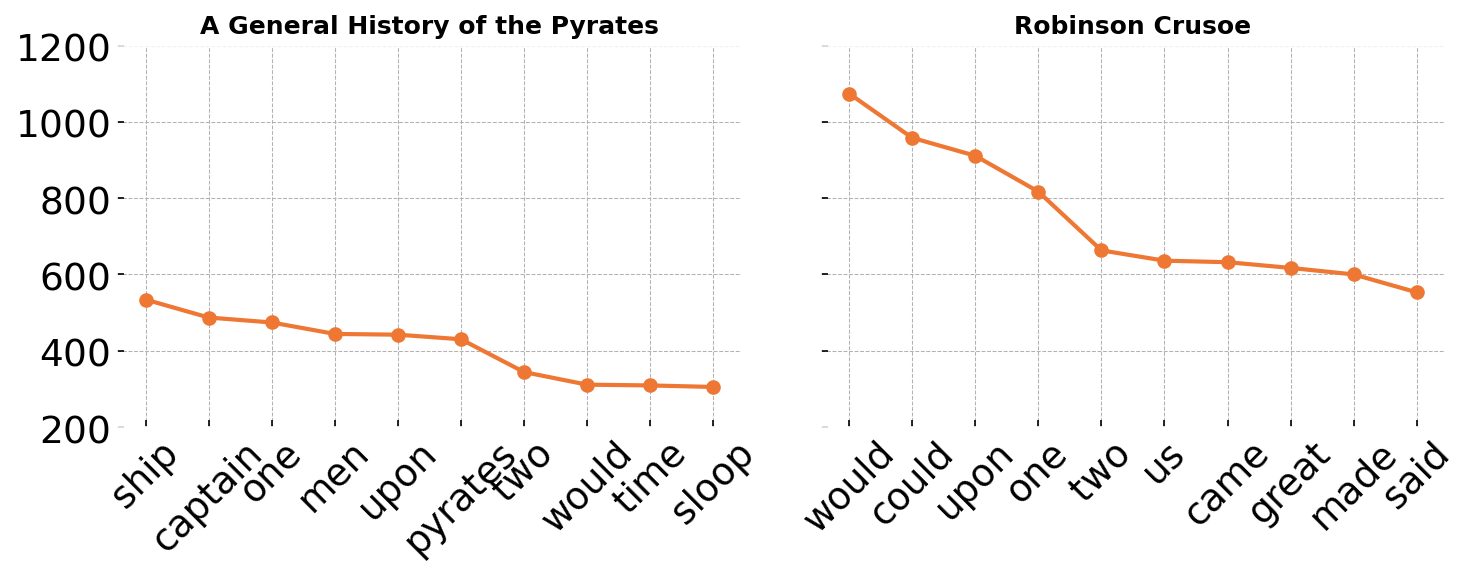

In [139]:
p_words = []
p_counts = []
for word, count in pyrates_dist.most_common(10):
    p_words.append(word)
    p_counts.append(count)

rc_words = []
rc_counts = []
for word, count in rc_dist.most_common(10):
    rc_words.append(word)
    rc_counts.append(count)

fig, axes = plt.subplots(1,2, figsize = (10,4), sharey=True)

axes[0].plot(p_words,p_counts)
axes[1].plot(rc_words,rc_counts)

axes[0].set_xticks(range(len(p_words)))
axes[0].set_xticklabels(p_words,rotation=45)
axes[0].set_title('A General History of the Pyrates', size = 12)

axes[1].set_xticks(range(len(rc_words)))
axes[1].set_xticklabels(rc_words,rotation=45)
axes[1].set_title('Robinson Crusoe', size = 12)

axes[0].set_yticks(np.arange(200,1400,200))

plt.show()


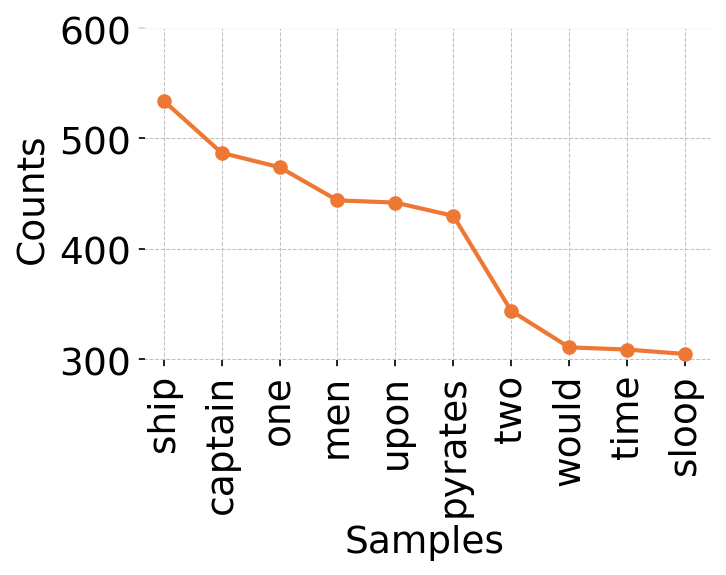

In [96]:
pyrates_dist.plot(10)
plt.yticks(np.arange(300,700,100))
plt.show()

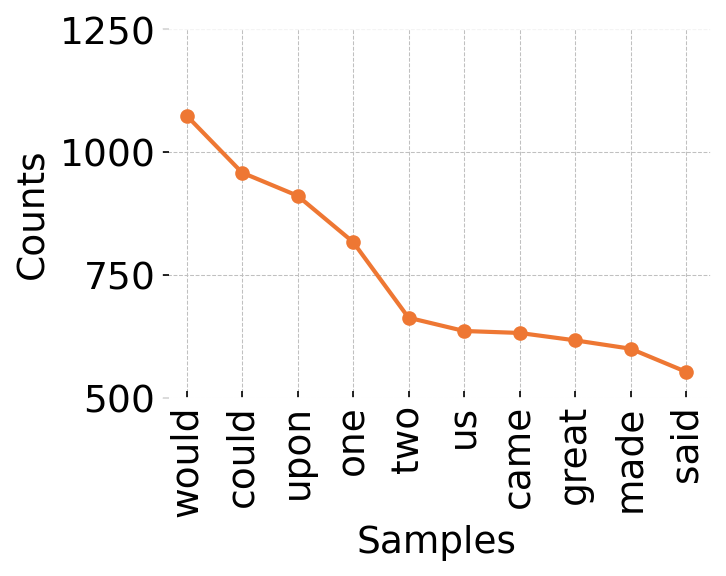

In [94]:
rc_dist.plot(10)
plt.yticks(np.arange(500,1500,250))
plt.show()

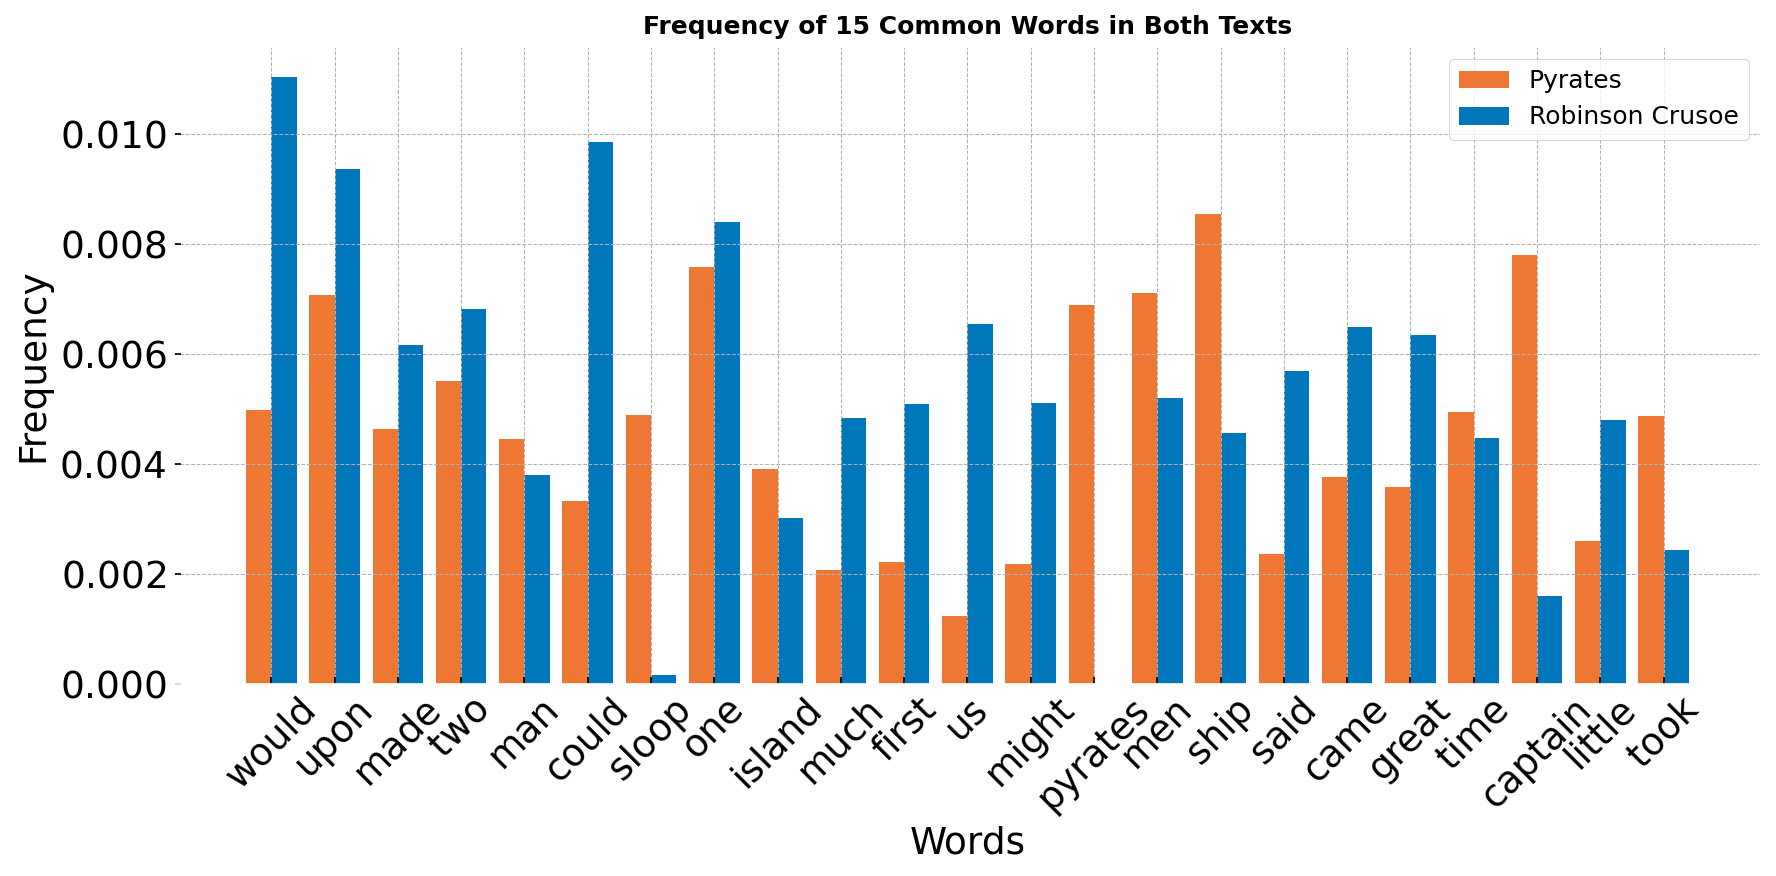

In [140]:
# get the 15 most common words from each distribution
pyrates_most_common = set(word for word, _ in pyrates_dist.most_common(15))
rc_most_common = set(word for word, _ in rc_dist.most_common(15))

common_words = list(pyrates_most_common.union(rc_most_common))

# calculate relative frequencies (percentages)
pyrates_total_words = sum(pyrates_dist.values())
rc_total_words = sum(rc_dist.values())

pyrates_freq = [(pyrates_dist[word] / pyrates_total_words) for word in common_words]
rc_freq = [(rc_dist[word] / rc_total_words) for word in common_words]


plt.figure(figsize=(12, 6))
x = range(len(common_words))

plt.bar(x, pyrates_freq, width=0.4, label='Pyrates', align='center')
plt.bar([i + 0.4 for i in x], rc_freq, width=0.4, label='Robinson Crusoe',  align='center')

# Add labels and legend
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of 15 Common Words in Both Texts', size = 12)
plt.xticks([i + 0.2 for i in x], common_words, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Zipf Laws

In [33]:
zipf_pyrates_text = pre_process_rc(pyrates_text,remove_stop_words=False)
zipf_rc_text = pre_process_rc(rc_text,remove_stop_words=False)

In [34]:
pyrates_tokens_zipf = word_tokenize(zipf_pyrates_text)
pyrates_dist_zipf = FreqDist(pyrates_tokens_zipf)

rc_tokens_zipf = word_tokenize(zipf_rc_text)
rc_dist_zipf = FreqDist(rc_tokens_zipf)

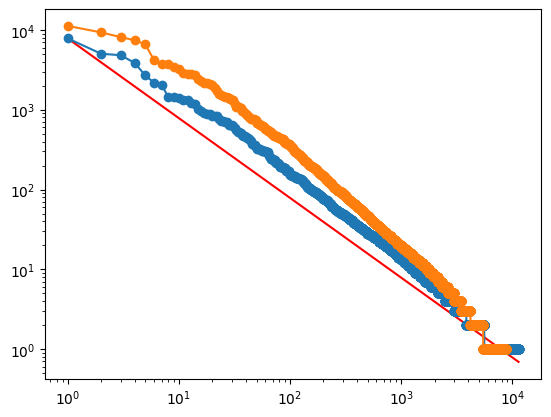

In [36]:
pyrates_freqs = sorted(pyrates_dist_zipf.values(), reverse=True)
pyrates_ranks = np.arange(1, len(pyrates_freqs) + 1)

rc_freqs = sorted(rc_dist_zipf.values(), reverse=True)
rc_ranks = range(1, len(rc_freqs) + 1)


max_freq = pyrates_freqs[0]  
theoretical_frequencies = max_freq / pyrates_ranks
plt.plot(pyrates_ranks, theoretical_frequencies, color='red', label='Zipf reference line') 

plt.plot(pyrates_ranks, pyrates_freqs, '-o')
plt.plot(rc_ranks, rc_freqs, '-o')
plt.semilogx()
plt.semilogy()
plt.show()

### Looking at newspaper by Nathaniel Mist

Nathaniel Mist is another possible author of the book, but he only has newspaper articles to compare to

In [37]:
with open("../books/mist_weekly_journal.txt", "r") as file:
    mist_text = file.read()

In [38]:
print(mist_text[:500])

- = oe me

i aellil ont ieee a
‘ st

ee — eee

oe
> 4!
yo

-° 3S

“ee

~~ -

4

‘epirtace tb
Ss a ;

.. . Teas ~
wee aN s oyw _ 1
wea. RO

# ‘ z . . ‘ wr
a eer
¢ A
-5e e
a ae “~~

ww

(3069 )

- #.ce of . . . ee. « ® - O46
aa ie c Pee. - - 7
>

ELIA

Ro 323

SATURDAY, January 2, 1724-5. | ,

Tu Nihil invita dices faciefse Minerva. Hor.
Ceft en Vain, qu ‘at Paviallc un temeraive Juteur,

| Penfe de V'Art de Vers atteindve la Hautenr,
Sil ne fent point du Ciel PInflience crete,

Si fon Aftre en na


In [39]:
clean_mist = pre_process_weekly_journal(mist_text)

In [40]:
print(clean_mist[:500])

oe me i a st oe yo a wee aN s z a eer A e a ae ce of aa ie c Pee Tu en Vain at un de de la Sil ne fent point Si en ne forme HAVE here the S Authority of rhe as well as of their own and of their own Times to prove that a Man who not from Nature re the divine Genius of will never be a to produce any Thing in that Way worthy the of the There is a Story of one La who writ a in upon the Art of Poetry which R was well received by this he a Tragedy and one to the un the Title of Tho this Piece with and


In [41]:
mist_tokens = word_tokenize(clean_mist)
mist_dist = FreqDist(mist_tokens)

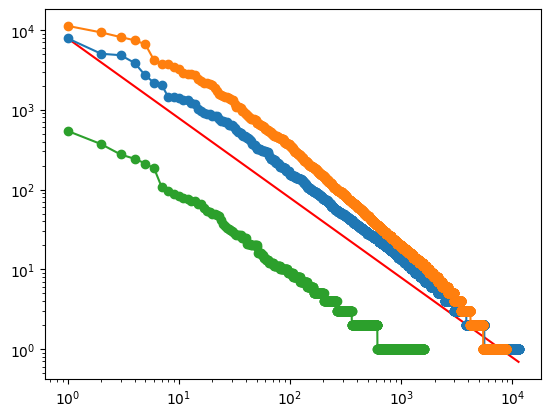

In [42]:
mist_freqs = sorted(mist_dist.values(), reverse=True)
mist_ranks = range(1, len(mist_dist) + 1)

plt.plot(pyrates_ranks, theoretical_frequencies, color='red', label='Zipf reference line') 

plt.plot(pyrates_ranks, pyrates_freqs, '-o')
plt.plot(rc_ranks, rc_freqs, '-o')
plt.plot(mist_ranks, mist_freqs, '-o')
plt.semilogx()
plt.semilogy()
plt.show()

### Looking a different author from the same time period

In [44]:
lines_to_skip = 28

with open('../books/jonathan_swift/gullivers_travels.txt', 'r') as file:
    for _ in range(lines_to_skip):
        next(file)

    gt_text = file.read()

In [45]:
print(gt_text[:500])

The author of these Travels, Mr. Lemuel Gulliver, is my ancient and
intimate friend; there is likewise some relation between us on the
mother’s side. About three years ago, Mr. Gulliver growing weary of the
concourse of curious people coming to him at his house in Redriff, made
a small purchase of land, with a convenient house, near Newark, in
Nottinghamshire, his native country; where he now lives retired, yet in
good esteem among his neighbours.

Although Mr. Gulliver was born in Nottinghamshi


In [46]:
clean_gt = pre_process_gt(gt_text, remove_stop_words=False)

In [47]:
print(clean_gt[:500])

the author of these travels mr. lemuel gulliver is my ancient and intimate friend there is likewise some relation between us on the mothers side about three years ago mr. gulliver growing weary of the concourse of curious people coming to him at his house in redriff made a small purchase of land with a convenient house near newark in nottinghamshire his native country where he now lives retired yet in good esteem among his neighbours although mr. gulliver was born in nottinghamshire where his fa


In [48]:
gt_tokens = word_tokenize(clean_gt)
gt_dist = FreqDist(gt_tokens)

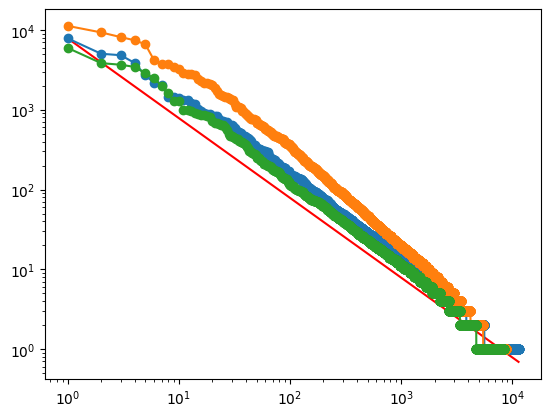

In [49]:
gt_freqs = sorted(gt_dist.values(), reverse=True)
gt_ranks = range(1, len(gt_dist) + 1)

plt.plot(pyrates_ranks, theoretical_frequencies, color='red', label='Zipf reference line') 

plt.plot(pyrates_ranks, pyrates_freqs, '-o')
plt.plot(rc_ranks, rc_freqs, '-o')
plt.plot(gt_ranks, gt_freqs, '-o')
plt.semilogx()
plt.semilogy()
plt.show()

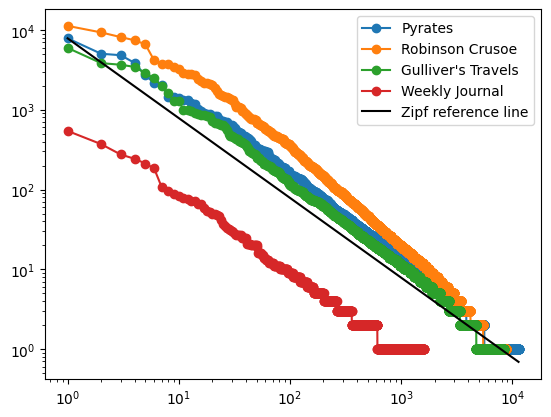

In [50]:
gt_freqs = sorted(gt_dist.values(), reverse=True)
gt_ranks = range(1, len(gt_dist) + 1)

plt.plot(pyrates_ranks, pyrates_freqs, '-o', label = 'Pyrates')
plt.plot(rc_ranks, rc_freqs, '-o', label = 'Robinson Crusoe')
plt.plot(gt_ranks, gt_freqs, '-o', label = 'Gulliver\'s Travels')
plt.plot(mist_ranks, mist_freqs, '-o', label = 'Weekly Journal')

plt.plot(pyrates_ranks, theoretical_frequencies, color='black', label='Zipf reference line') 

plt.semilogx()
plt.semilogy()
plt.legend()
plt.show()

Tail of a Tub

In [53]:
lines_to_skip = 249

with open('../books/jonathan_swift/tale_of_a_tub.txt', 'r') as file:
    for _ in range(lines_to_skip):
        next(file)

    tub_text = file.read()

In [54]:
clean_tub = pre_process_gt(tub_text, remove_stop_words=False)

In [55]:
tub_tokens = word_tokenize(clean_tub)
tub_dist = FreqDist(tub_tokens)

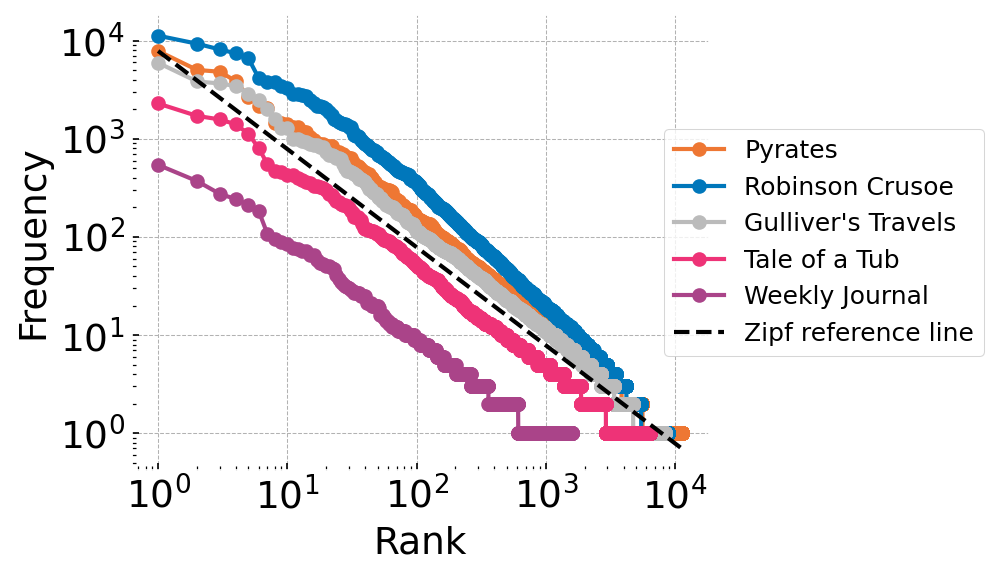

In [89]:
tub_freqs = sorted(tub_dist.values(), reverse=True)
tub_ranks = range(1, len(tub_dist) + 1)

plt.figure(figsize=(8,4))

plt.plot(pyrates_ranks, pyrates_freqs, '-o', label = 'Pyrates')
plt.plot(rc_ranks, rc_freqs, '-o', label = 'Robinson Crusoe')
plt.plot(gt_ranks, gt_freqs, '-o', label = 'Gulliver\'s Travels')
plt.plot(tub_ranks, tub_freqs, '-o', label = 'Tale of a Tub')
plt.plot(mist_ranks, mist_freqs, '-o', label = 'Weekly Journal')

plt.plot(pyrates_ranks, theoretical_frequencies, '--', color='black', label='Zipf reference line') 

plt.semilogx()
plt.semilogy()
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.legend(loc='center right', bbox_to_anchor=(1.5,.5), ncol=1)
plt.show()